# plotting with pandas
A few examples of creating common types of plots using `pandas`' built-in support for `matplotlib`.

## Imports
Import the common modules used for pandas-based data analysis

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Line plots
The default plot type in `pandas` is the line plot.

In [104]:
# make a simple time series with dummy data - we will use random values for each day of the year 2021
ts = pd.Series(np.random.randn(365), index=pd.date_range("1/1/2021", periods=365), name='vals')
ts

2021-01-01   -0.746605
2021-01-02   -0.699061
2021-01-03    0.186155
2021-01-04   -0.254649
2021-01-05    0.078189
                ...   
2021-12-27   -0.659136
2021-12-28   -0.202299
2021-12-29    0.276940
2021-12-30    1.590742
2021-12-31   -1.657636
Freq: D, Name: vals, Length: 365, dtype: float64

Create a simple line plot - the index of the Series will be used as the `x` axis, and the values will be plotting on the `y` axis.

<AxesSubplot:>

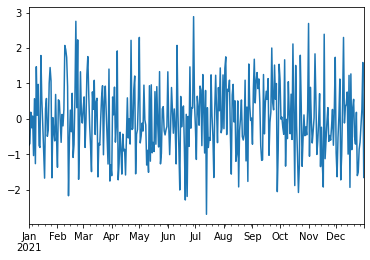

In [105]:
# defaults to line plot
ts.plot()

We can also easily plot the cumulative sum of all prior values at each date.

<AxesSubplot:>

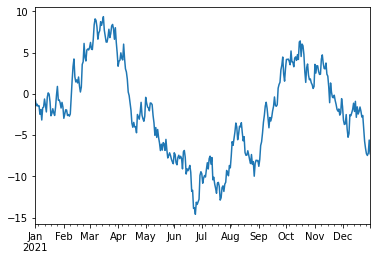

In [106]:
# calculate the cumulative sum of values up to each date
ts = ts.cumsum()
ts.plot()

Let's create a dataframe with this time Series and another one to show how to place two lines on a single plot.

In [107]:
df_ts = pd.DataFrame({
    'first series': ts,
    'second series': np.random.randn(365).cumsum()
    }
)
df_ts.head(3)

,first series,second series
2021-01-01,-0.746605,0.079716
2021-01-02,-1.445666,0.032391
2021-01-03,-1.259512,-0.931992


<AxesSubplot:>

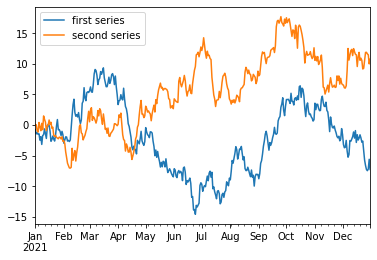

In [108]:
df_ts.plot()

## Bar chart

In [109]:
# create a new index, which places the old index, the dates, into a regular column named 'index'
df = df_ts.reset_index()
df

,index,first series,second series
0,2021-01-01,-0.746605,0.079716
1,2021-01-02,-1.445666,0.032391
2,2021-01-03,-1.259512,-0.931992
3,2021-01-04,-1.514161,-1.151726
4,2021-01-05,-1.435972,0.419263
...,...,...,...
360,2021-12-27,-7.271472,11.897378
361,2021-12-28,-7.473771,11.638175
362,2021-12-29,-7.196831,11.481280
363,2021-12-30,-5.606090,10.001007


In [110]:
# rename the 'index' column to 'date'
df.rename(columns = {"index": "date"}, inplace=True)
df

,date,first series,second series
0,2021-01-01,-0.746605,0.079716
1,2021-01-02,-1.445666,0.032391
2,2021-01-03,-1.259512,-0.931992
3,2021-01-04,-1.514161,-1.151726
4,2021-01-05,-1.435972,0.419263
...,...,...,...
360,2021-12-27,-7.271472,11.897378
361,2021-12-28,-7.473771,11.638175
362,2021-12-29,-7.196831,11.481280
363,2021-12-30,-5.606090,10.001007


In [111]:
# ensure the dates are in a date data type
df["date"] = df["date"].astype("datetime64")

In [112]:
# add a month field
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
df.sample(5)

,date,first series,second series,month
244,2021-09-02,-7.954533,8.239892,2021-09
52,2021-02-22,3.879042,-2.431524,2021-02
259,2021-09-17,-1.518136,12.668946,2021-09
133,2021-05-14,-4.326805,4.825656,2021-05
171,2021-06-21,-11.701598,6.804030,2021-06


Group rows by month and calculate the sum of the values in each month

In [113]:
# group rows by month and calculate the sum of the values in each month
g = df.groupby(df['date'].dt.month.rename('month')).agg({'sum'})
g

,first series,second series
,sum,sum
month,,
1,-42.469993,-23.429307
2,37.647919,-91.001623
3,227.063553,13.084896
4,-7.729716,-37.343851
5,-152.157688,123.183743
6,-293.634266,219.517975
7,-315.949980,247.968268
8,-203.255173,198.667287


Plot the data in the first series:

<AxesSubplot:xlabel='month', ylabel='first series'>

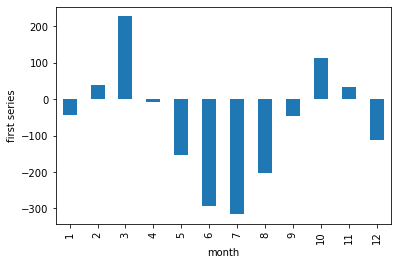

In [114]:
#plot the data in the first series column
g.plot.bar(
    y=['first series'], 
    ylabel='first series', 
    legend=False
) # the index will serve as the x axis, by default

Plot both series in side-by-side bars:

<AxesSubplot:xlabel='month'>

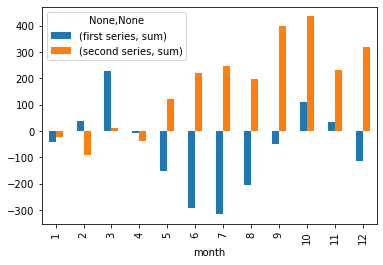

In [115]:
#plot both series in side-by-side bars
g.plot.bar() # the index will serve as the x axis, by default

Plot both series in a stacked bar chart


<AxesSubplot:xlabel='month'>

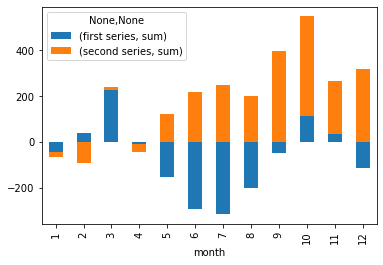

In [116]:
# plot both series in a stacked bar chart
g.plot.bar(stacked=True) # the index will serve as the x axis, by default

## Area chart
Let's show a few details about another chart type - the area chart.

In [117]:
# generate some random data for four columns in a pandas dataframe
df = pd.DataFrame(np.random.rand(10, 4), columns=["foo", "bar", "bum", "baz"])
df.sample(3)

,foo,bar,bum,baz
4,0.998439,0.883485,0.399423,0.635173
3,0.434995,0.156579,0.851399,0.312052
6,0.683337,0.273914,0.025102,0.798555


Plot just a single column:

<AxesSubplot:>

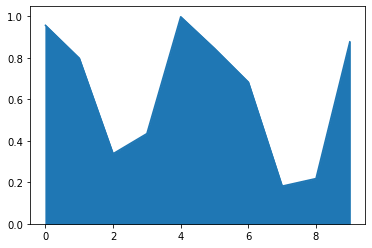

In [118]:
df['foo'].plot.area()

Plot two columns, stacked up on top of each other.

<AxesSubplot:>

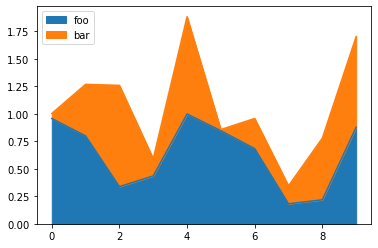

In [119]:
df[ ['foo', 'bar'] ].plot.area()

Plot all columns, stacked up on top of each other.  The default value of the `stacked` argument is `True`, but we include it here anyone just for reference.

<AxesSubplot:xlabel='The label for the x axis', ylabel='The label for the y axis!'>

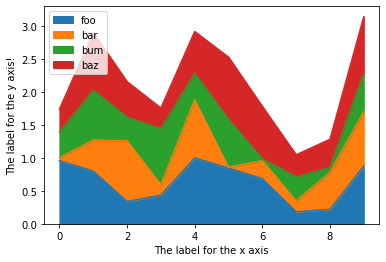

In [120]:
df.plot.area(
    xlabel='The label for the x axis', 
    ylabel='The label for the y axis!', 
    stacked=True
)

## Real data set
We will use the NYC jobs data set, from the NYC Open Data initiative.

In [121]:
# open data about NYC jobs from https://data.cityofnewyork.us/City-Government/NYC-Jobs/kpav-sd4t
df = pd.read_csv('./NYC_Jobs.csv')
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
299,456751,TAXI & LIMOUSINE COMMISSION,External,4,Prosecuting Attorney,AGENCY ATTORNEY,Non-Competitive-5,30087,01,Legal Affairs,...,NaN,"Click, APPLY NOW Current city employees must a...",NaN,"31-00 47 Ave, 3 FL, LIC NY",NaN,New York City residency is generally required ...,01/13/2021,NaN,01/19/2021,04/13/2021
577,234203,ADMIN FOR CHILDREN'S SVCS,External,1,Business and Data Analyst Manager,ASSOCIATE STAFF ANALYST,Competitive-1,12627,00,"Finance, Accounting, & Procurement",...,Section 424-A of the New York Social Services ...,Click on the Apply Now button.,NaN,NaN,NaN,New York City residency is generally required ...,03/03/2016,NaN,03/04/2016,04/13/2021
599,439675,NYC HOUSING AUTHORITY,External,5,PLUMBER'S HELPER,PLUMBER'S HELPER,Competitive-1,91916,00,Building Operations & Maintenance,...,1.\tThis position is open as a promotional opp...,Click the Apply Now button.,NaN,NaN,NaN,NYCHA has no residency requirements.,04/29/2020,NaN,04/29/2020,04/13/2021


Only include those jobs with an annual salary.

In [122]:
# let's limit to only annual jobs
df = df[ df['Salary Frequency'] == 'Annual' ]
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
689,457622,DEPT OF INFO TECH & TELECOMM,Internal,1,Deputy CISO - Urban Technology,TELECOMMUNICATION MANAGER,Competitive-1,82984,M5,"Technology, Data & Innovation",...,NaN,Special Note: Taking and passing civil service...,Day - Due to the necessary technical managemen...,"New York, NY",NaN,New York City residency is generally required ...,02/03/2021,NaN,02/11/2021,04/13/2021
753,455429,DEPT OF INFO TECH & TELECOMM,External,1,"Executive Director, Enterprise Systems Services",TELECOMMUNICATION MANAGER,Competitive-1,82984,M4,"Technology, Data & Innovation",...,NaN,Special Note: Taking and passing civil service...,Day - Due to the necessary technical managemen...,"Brooklyn, NY",NaN,New York City residency is generally required ...,03/22/2021,NaN,03/22/2021,04/13/2021
259,443297,ADMIN FOR CHILDREN'S SVCS,Internal,1,Contracting Officer,PROCUREMENT ANALYST,Competitive-1,12158,03,"Finance, Accounting, & Procurement",...,Section 424-A of the New York Social Services ...,Click the Apply Now button.,NaN,NaN,NaN,New York City residency is generally required ...,03/24/2021,23-APR-2021,03/24/2021,04/13/2021


Include only those jobs that pay more than $100,000 annually.

In [123]:
# let's limit to only jobs that could pay more than 80k
df = df[ df['Salary Range To'] > 100000 ]
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
1081,399783,LAW DEPARTMENT,Internal,1,Computer Associate (Technical Support) Level 3,COMPUTER ASSOC (TECH SUPP),Competitive-1,13611,03,Legal Affairs,...,The employee must possess the following as wel...,"To apply, click on the Apply Now button. Pleas...",NaN,"100 Church St., N.Y. N.Y. 10007",NaN,New York City residency is generally required ...,07/05/2019,NaN,08/23/2019,04/13/2021
1112,456705,CONSUMER AFFAIRS,External,1,Executive Agency Counsel,EXECUTIVE AGENCY COUNSEL,Non-Competitive-5,95005,M4,Legal Affairs,...,NaN,For Non-City/External Candidates: Visit the Ex...,NaN,NaN,NaN,New York City residency is generally required ...,01/14/2021,09-MAY-2021,04/01/2021,04/13/2021
1184,457808,NYC EMPLOYEES RETIREMENT SYS,Internal,1,CERTIFIED IT ADMINISTRATOR (LAN/WAN),CERTIFIED IT ADMINISTRATOR (LA,Competitive-1,13652,01,"Technology, Data & Innovation",...,NaN,"TO APPLY FOR CONSIDERATION, PLEASE FORWARD A C...",NaN,NaN,NaN,New York City Residency is not required for th...,02/02/2021,NaN,02/17/2021,04/13/2021


Limit our dataframe to include only a few columns of interest.

In [127]:
# let's limit the columns we want
df = df[ ['Agency', '# Of Positions', 'Salary Range To'] ]
df

,Agency,# Of Positions,Salary Range To
0,NYC HOUSING AUTHORITY,1,130000.0
5,OFFICE OF THE COMPTROLLER,1,140000.0
9,FINANCIAL INFO SVCS AGENCY,1,130000.0
10,NYC HOUSING AUTHORITY,1,110000.0
15,NYC HOUSING AUTHORITY,1,109409.0
...,...,...,...
1210,DEPT OF INFO TECH & TELECOMM,5,120000.0
1211,LAW DEPARTMENT,1,126575.0
1212,LAW DEPARTMENT,1,126575.0
1214,ADMIN FOR CHILDREN'S SVCS,1,156793.0


Let's make a bar chart of the salary range to values for each agency

<AxesSubplot:xlabel='Agency', ylabel='Average Top Salary ($)'>

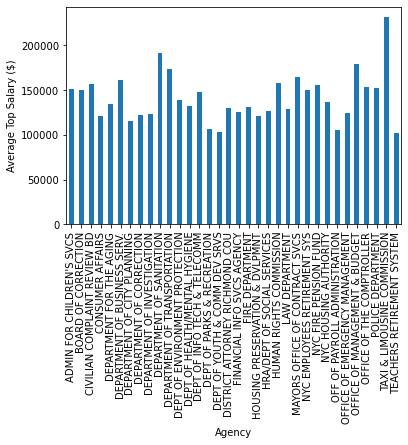

In [128]:
# let's quickly peek at a bar chart of the average salary range to values for each agency
df_to_plot = df[ ['Agency', 'Salary Range To'] ].groupby(by=['Agency']).aggregate({'mean'})
df_to_plot.plot.bar(ylabel='Average Top Salary ($)', legend=False)

Group together all the jobs within the same agency, and add up the number of positions in each agency.

In [129]:
# group jobs at each agency and calculate the sum of # of jobs at each agency
g = df.groupby(df['Agency']).agg({'sum'})
g.head(10)

,# Of Positions,Salary Range To
,sum,sum
Agency,,
ADMIN FOR CHILDREN'S SVCS,15,1817262.0
BOARD OF CORRECTION,2,300000.0
CIVILIAN COMPLAINT REVIEW BD,1,156829.0
CONSUMER AFFAIRS,6,725214.0
DEPARTMENT FOR THE AGING,6,806000.0
DEPARTMENT OF BUSINESS SERV.,3,485082.0
DEPARTMENT OF CITY PLANNING,3,345000.0
DEPARTMENT OF CORRECTION,12,1463456.0


A horizontal bar chart that shows the number of open positions within each agency of the NYC government:

<AxesSubplot:ylabel='Agency'>

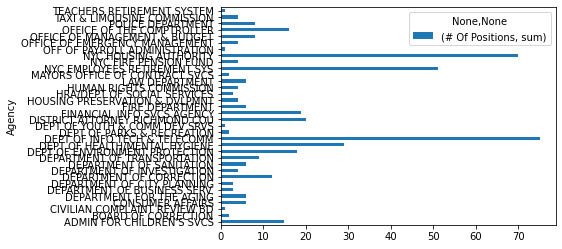

In [131]:
# plot the jobs at each agency
g.plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

A horizontal bar chart that shows the bottom 10 agencies, by number of open positions:
- first we sort the rows by number of positions, in ascending order
- then we grab the first 10 rows, reverse their order, and plot them.

<AxesSubplot:ylabel='Agency'>

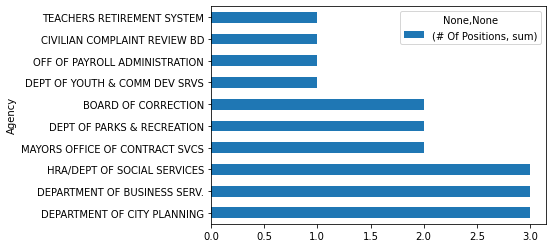

In [132]:
# that is a lot of agencies!
# perhaps limit to just the first few agencies!
g1 = g.sort_values(by=('# Of Positions', 'sum'), ascending=True)
g1[:10][::-1].plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

A horizontal bar chart that shows the top 10 agencies, by number of open positions:
- first we sort the rows by number of positions, in descending order
- then we grab the first 10 rows, reverse their order, and plot them.

<AxesSubplot:ylabel='Agency'>

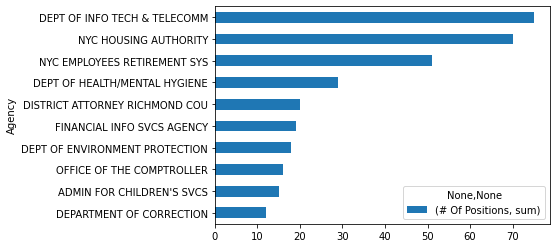

In [528]:
# plot the top agencies by number of positions
g2 = g.sort_values( ('# Of Positions', 'sum'), ascending=False )
g2[ : 10][::-1].plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

A vertical bar chart that shows the bottom 10 agencies, by number of open positions:

<AxesSubplot:xlabel='Agency'>

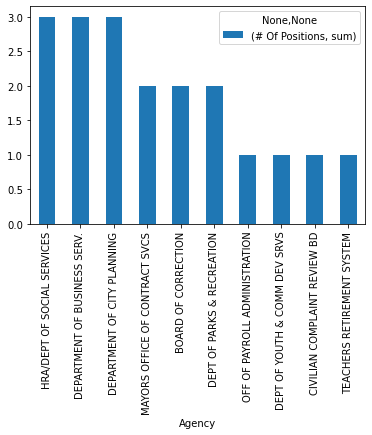

In [536]:
# plot the bottom agencies by number of positions
g2[-10 : ].plot.bar(y=['# Of Positions']) # the index will serve as the x axis, by default

## Pie charts

A pie chart that shows the proportion of available jobs that belong to each agency of NYC government.

<AxesSubplot:ylabel='sum'>

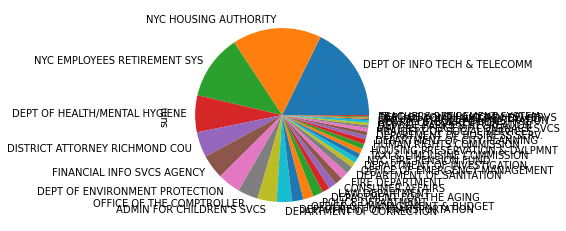

In [481]:
# pie chart of the top 10 agencies, by number of positions over 100k
g2.plot.pie(y='# Of Positions', legend=False)